<!-- Header Section -->
<header style="background-color:red; padding:20px; border-radius:20px;">
    <h1 style="font-family:newtimeroman; font-size:350%; color:Black; text-align:center;">
        Spam Email Detection Using Machine Learning
    </h1>
    <div class="image-container" style="text-align:center; margin-top:20px;">
        <img src="0_igDW-qYQQh_FS0Ky.jpg" alt="Email Detection" style="border-radius:15px; max-width:80%;">
    </div>
</header>

### Reset Script & Adding Libraries

In [1]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading and preprocessing the dataset

In [8]:
df=pd.read_csv("Spam Email Detection - spam.csv")


### Checking for null values in the DataFrame

In [9]:
#Checking for null values in Data

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### Creating a dataframe structure with relevant columns

In [12]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.shape

(5572, 2)

In [14]:
df.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

<Axes: xlabel='label'>

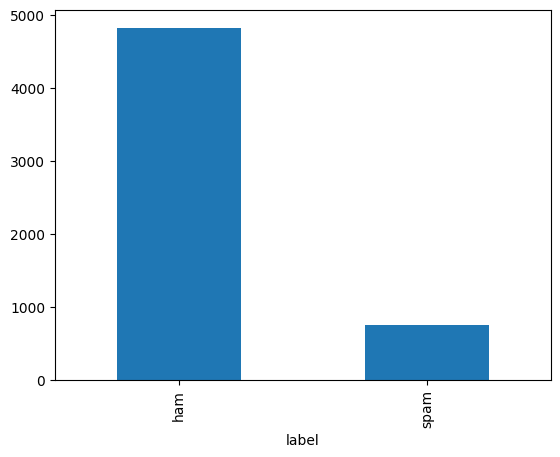

In [15]:
df['label'].value_counts().plot(kind='bar')

###  Preprocessing and stemming text data

In [19]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

### Creating a Bag of Words matrix using CountVectorizer

In [ ]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(df['label'])
Y = Y.iloc[:, 1].values
     

### Splitting the dataset into training and testing sets

In [ ]:
# Splitting the Dataset into Training and Testing Set


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

### Training the models: Random Forest Classifier, Decision Tree Classifier, and Multinomial Naive Bayes

In [ ]:
# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

###  Making predictions

In [ ]:
predA = model1.predict(X_test)
predB = model2.predict(X_test)
predC = model3.predict(X_test)

### Model Testing

**Testing Model**


##### Evaluating the models with Confusion Matrix and Accuracy Score

In [ ]:
# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, predA))
print("Accuracy: ", accuracy_score(Y_test, predA))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, predB))
print("Accuracy: ", accuracy_score(Y_test, predB))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, predC))
print("Accuracy: ", accuracy_score(Y_test, predC))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predC)

import seaborn as sns
sns.heatmap(cm, annot=True)

### Evaluate the models with Classification Reports

In [ ]:
# Evaluate the models with Classification Reports
report1 = classification_report(Y_test, predA)
print("Classification Report for RFC \n", report1)

report2 = classification_report(Y_test, predB)
print("Classification Report for DTC \n", report2)

report3 = classification_report(Y_test, predC)
print("Classification Report for MNB \n", report3)


**Best Model is Multinomial Naive Bayes**

### Saving All Models

In [ ]:
filename = "RFC.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(model2, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved all Models")
     